<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/opencv_basics/104/opencv_color_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-color-correction/opencv-color-correction.zip
!unzip -qq opencv-color-correction.zip
%cd opencv-color-correction
%ls -hal

--2022-06-04 15:26:05--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-color-correction/opencv-color-correction.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.251.49
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.251.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29276262 (28M) [application/zip]
Saving to: ‘opencv-color-correction.zip’

opencv-color-correc 100%[===================>]  27.92M  25.5MB/s    in 1.1s    

2022-06-04 15:26:07 (25.5 MB/s) - ‘opencv-color-correction.zip’ saved [29276262/29276262]

/content/opencv-color-correction
total 6.0M
drwxr--r-- 3 root root 4.0K Dec 31  2020 ./
drwxr-xr-x 1 root root 4.0K Jun  4 15:26 ../
-rwxr--r-- 1 root root 3.3K Dec 31  2020 color_correction.py*
drwxr--r-- 2 root root 4.0K Dec 30  2020 examples/
-rwxr--r-

In [7]:
# import the necessary packages
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
from imutils.perspective import four_point_transform
from skimage import exposure

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
def find_color_card(image):
    # load ArUCo dict and grab parameters
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
    aruco_params = cv2.aruco.DetectorParameters_create()
    # detect markers in input image
    (corners, ids, rejected) = cv2.aruco.detectMarkers(
        image, 
        aruco_dict, 
        parameters=aruco_params
        )
    
    # try to extract coords of color correction card
    try:
        # flatten marker IDs
        ids = ids.flatten()

        # extract the top-left marker
        i = np.squeeze(np.where(ids == 923))
        tl = np.squeeze(corners[i])[0]

        # extract the top-right marker
        i = np.squeeze(np.where(ids == 1001))
        tr = np.squeeze(corners[i])[1]

        # extract the bottom-right marker
        i = np.squeeze(np.where(ids == 241))
        br = np.squeeze(corners[i])[2]

        # extract the bottom-left marker
        i = np.squeeze(np.where(ids == 1007))
        bl = np.squeeze(corners[i])[3]
    # couldn't find the card, so return
    except:
        return None
    
    # build list of ref points and apply perspective transform
    # to obtain a top-down "birds-eye" view of the card
    card_coords = np.array([tl, tr, br, bl])
    card = four_point_transform(image, card_coords)

    # return color matching card
    return card

In [5]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-r", "--reference", required=True,
# 	help="path to the input reference image")
# ap.add_argument("-i", "--input", required=True,
# 	help="path to the input image to apply color correction to")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "reference": "reference.jpg",
    "input": "examples/01.jpg"
}

[INFO] loading images...


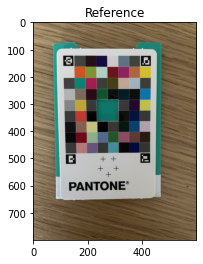

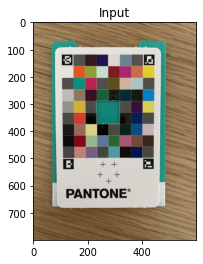

In [8]:
# load the reference image and input images from disk
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

In [9]:
# find the card in each image
print("[INFO] finding color matching cards...")
ref_card = find_color_card(ref)
image_card = find_color_card(image)

# if card is not found in either image, exit
if ref_card is None or image_card is None:
    print("[INFO] failed to find color matching card in both images")

[INFO] finding color matching cards...


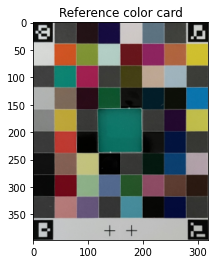

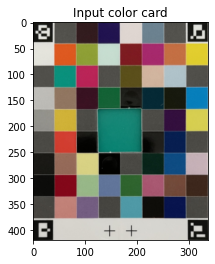

[INFO] matching images...


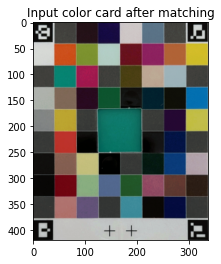

In [10]:
# show color matching cards from both images
plt_imshow("Reference color card", ref_card)
plt_imshow("Input color card", image_card)

# apply histogram matching from card in reference to car in input
print("[INFO] matching images...")
image_card = exposure.match_histograms(image_card, ref_card, multichannel=True)

# show our input color card after matching
plt_imshow("Input color card after matching", image_card)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [Automatic color correction with OpenCV and Python](https://www.pyimagesearch.com/2021/02/15/automatic-color-correction-with-opencv-and-python/) published on 02-15-21.